# Maternal Health Risk Analysis



<img src="https://miro.medium.com/max/400/1*rmj7B0EumeMHL4SiW6tD5Q.gif" width="600px">

Pregnancy is a pivotal phase in a woman's life, demanding monitoring of maternal health to ensure the well-being of both the expecting mother and the unborn child. Complications during pregnancy can pose serious risks, making it necessary for early detection and intervention.

The objective is to develop a predictive model that assesses the potential risks associated with pregnancy based on a set of crucial health indicators. These indicators may include maternal age, medical history, lifestyle factors, and various physiological parameters.

## Data Description

**Age:** Represents the age of pregnant women in years. Any ages are considered during pregnancy.

**Systolic Blood Pressure (SystolicBP):** The upper value of Blood Pressure measured in millimeters of mercury (mmHg). Systolic blood pressure is a significant attribute during pregnancy.

**Diastolic Blood Pressure (DiastolicBP):** The lower value of Blood Pressure measured in millimeters of mercury (mmHg). Diastolic blood pressure is another significant attribute during pregnancy.

**Blood Glucose Levels (BS):** Blood glucose levels expressed in terms of a molar concentration, measured in millimoles per liter (mmol/L).

**Body Temperature (BodyTemp):** Represents the body temperature of pregnant women, measured in degrees Fahrenheit (F).

**Heart Rate:** A normal resting heart rate of pregnant women, measured in beats per minute (bpm).

**Risk Level:** Predicted Risk Intensity Level during pregnancy, considering the previous health attributes. This is the target variable for risk prediction.

## The imports

In [60]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings("ignore")

## The dataset

In [61]:
df=pd.read_csv('../datasets/pregnancy-risk-datasets/Maternal Health Risk Data Set.csv')

In [62]:
df.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

## Explorative Data Analysis (EDA)

### Descriptive Statistics

In [63]:
df.shape

(1014, 7)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


#### Statistical data summaries

In [65]:
df.describe().transpose()

count        mean        std   min    25%    50%    75%    max
Age          1014.0   29.871795  13.474386  10.0   19.0   26.0   39.0   70.0
SystolicBP   1014.0  113.198225  18.403913  70.0  100.0  120.0  120.0  160.0
DiastolicBP  1014.0   76.460552  13.885796  49.0   65.0   80.0   90.0  100.0
BS           1014.0    8.725986   3.293532   6.0    6.9    7.5    8.0   19.0
BodyTemp     1014.0   98.665089   1.371384  98.0   98.0   98.0   98.0  103.0
HeartRate    1014.0   74.301775   8.088702   7.0   70.0   76.0   80.0   90.0

#### Summary
The dataset provides insights into the demographic and health-related characteristics. The age distribution spans from 10 to 70 years, with an average age of approximately 29.87 years. The majority of individuals fall within the age range of 19 to 39. Systolic blood pressure varies widely, ranging from 70 to 160 mmHg, with an average of approximately 113.20 mmHg. A big portion of the population has a systolic blood pressure of 120 mmHg.

In terms of diastolic blood pressure, the range extends from 49 to 100 mmHg, with an average of approximately 76.46 mmHg. The majority of individuals have diastolic blood pressure levels below 90 mmHg. Blood sugar levels in the population vary from 6 to 19, with an average level of approximately 8.73. The range for blood sugar falls between 6.9 and 8.

Body temperature readings range from 98 to 103째F, with an average temperature of approximately 98.67째F. The most common body temperature observed is 98째F. Heart rates exhibit variability, ranging from 7 to 90 beats per minute, with an average rate of approximately 74.30 beats per minute. The predominant heart rate range lies between 70 and 80 beats per minute.

### Checking for missing values in the dataset

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64




<Axes: >

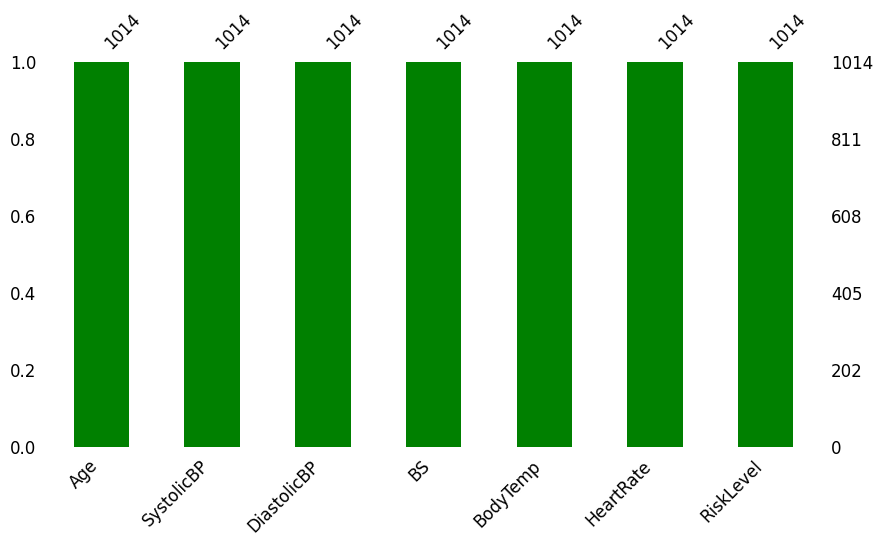

In [66]:
print(df.isnull().sum())
print('\n')
msno.bar(df,color = 'g',figsize=(10,5), fontsize=12)

#### Univarient, bivarient and multivarient analysis

In [67]:
# Numerical variables
numerical_columns = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
categorical_columns = ['RiskLevel']

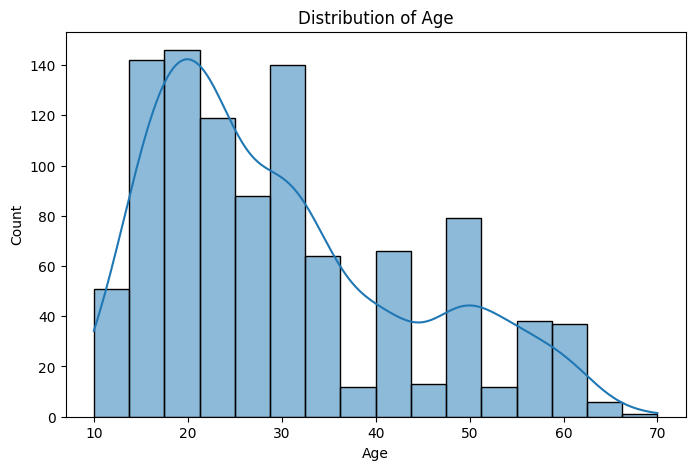

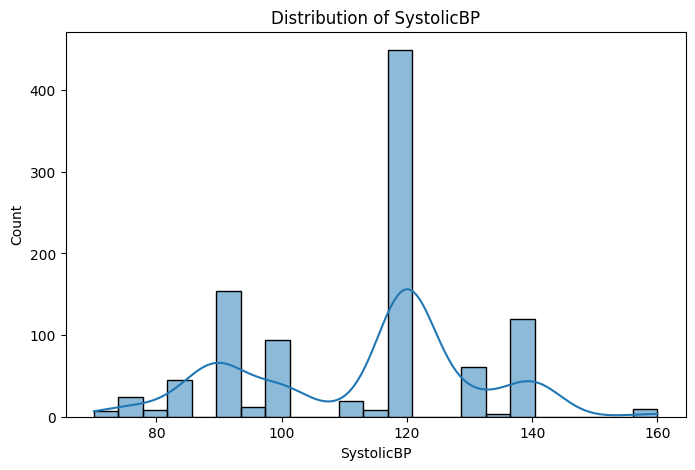

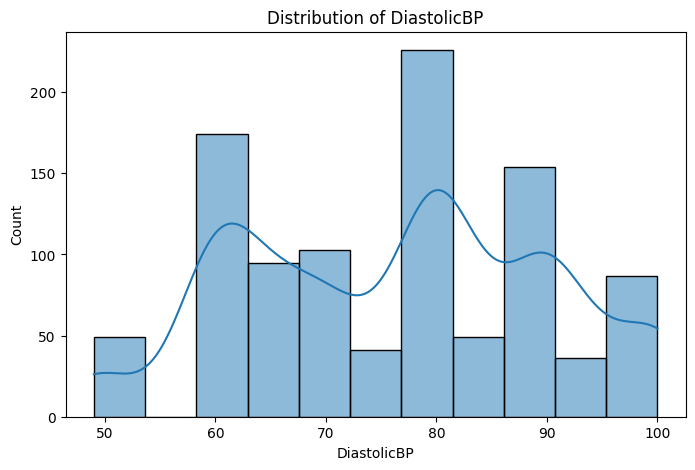

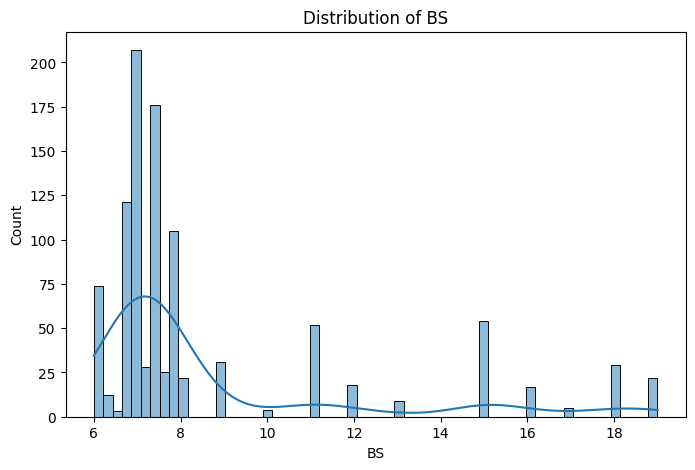

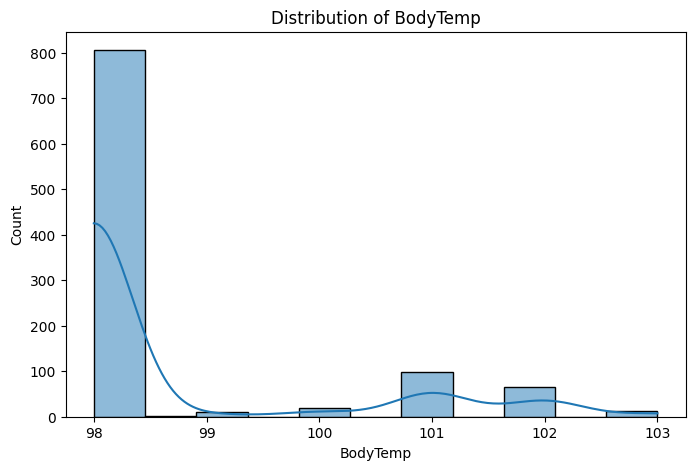

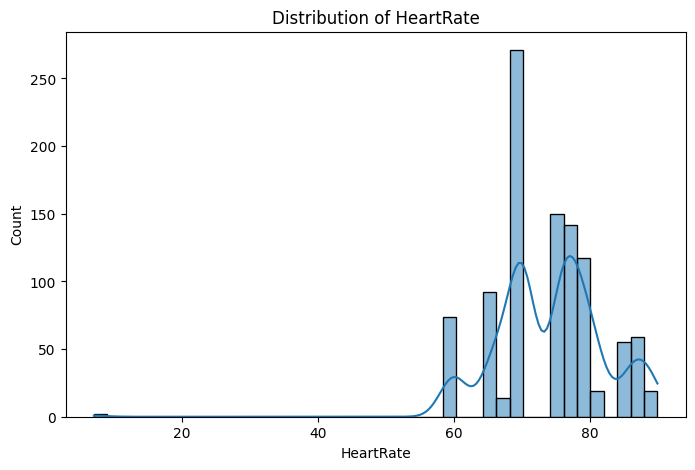

In [68]:
#Plot 1: Univariate analysis for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

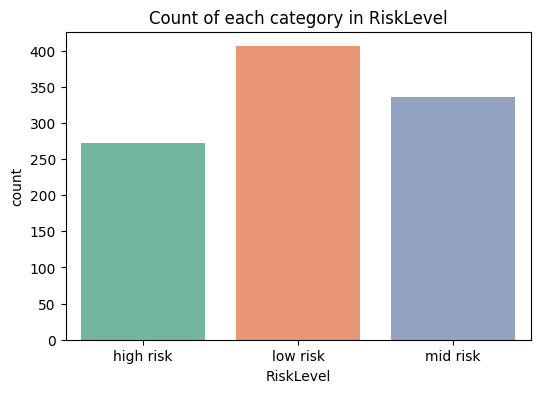

In [69]:
#Plot 2: Univariate analysis for categorical variable
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=df,palette='Set2')
    plt.title(f'Count of each category in {column}')
    plt.show()

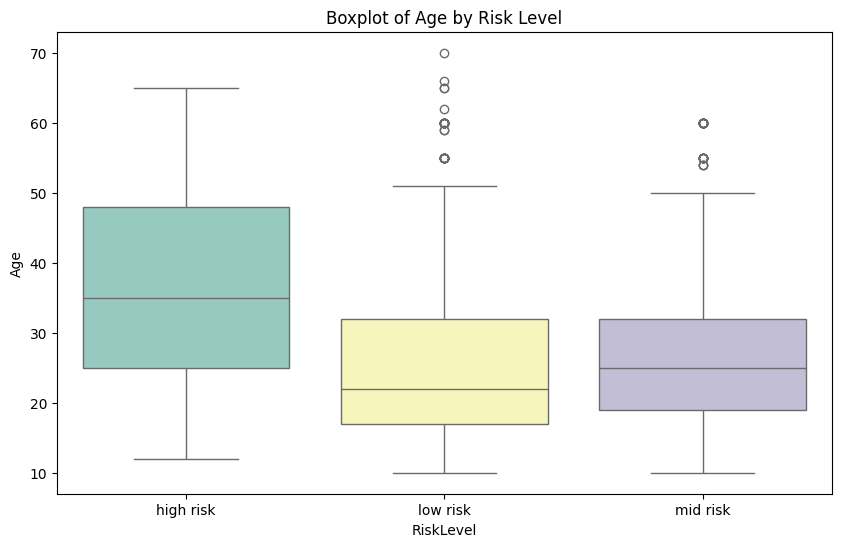

In [70]:
# Plot 3: Boxplot for Age and RiskLevel
plt.figure(figsize=(10, 6))
sns.boxplot(x="RiskLevel", y="Age", data=df, palette="Set3")
plt.title("Boxplot of Age by Risk Level")
plt.show()

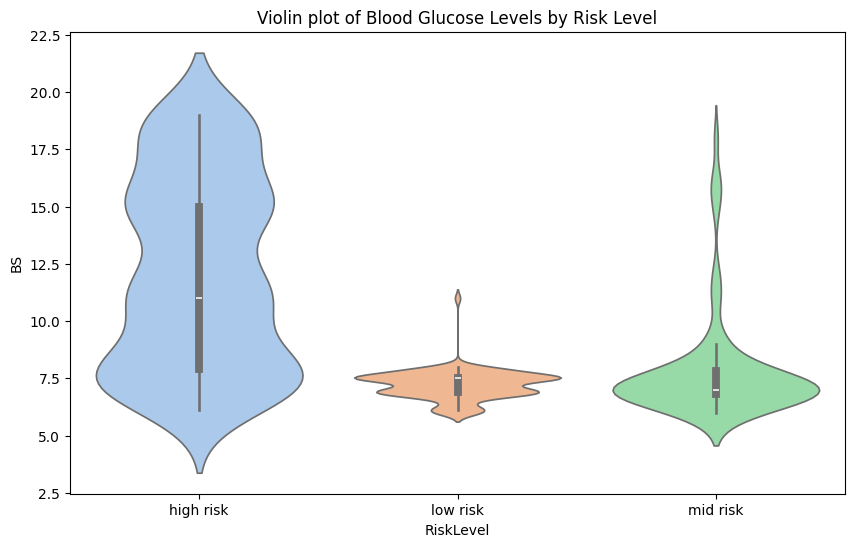

In [71]:
# Plot 4: Violin plot for Blood Glucose Levels and RiskLevel
plt.figure(figsize=(10, 6))
sns.violinplot(x="RiskLevel", y="BS", data=df, palette="pastel")
plt.title("Violin plot of Blood Glucose Levels by Risk Level")
plt.show()

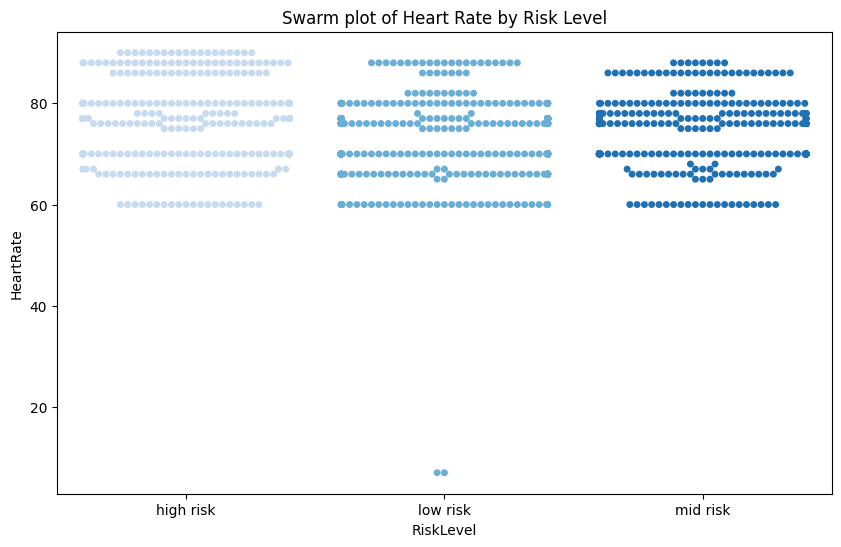

In [72]:
# Plot 5: Swarm plot for Heart Rate and RiskLevel
plt.figure(figsize=(10, 6))
sns.swarmplot(x="RiskLevel", y="HeartRate", data=df, palette="Blues")
plt.title("Swarm plot of Heart Rate by Risk Level")
plt.show()

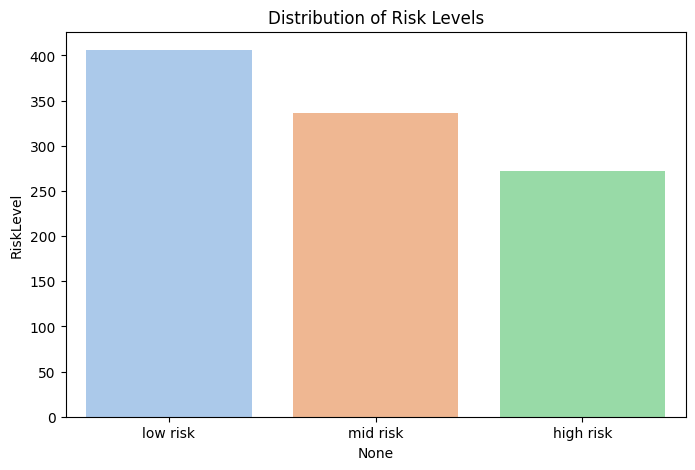

In [73]:
# Plot 6: Bar plot for RiskLevel distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=df["RiskLevel"].value_counts().index, y=df["RiskLevel"].value_counts(), palette="pastel")
plt.title("Distribution of Risk Levels")
plt.show()

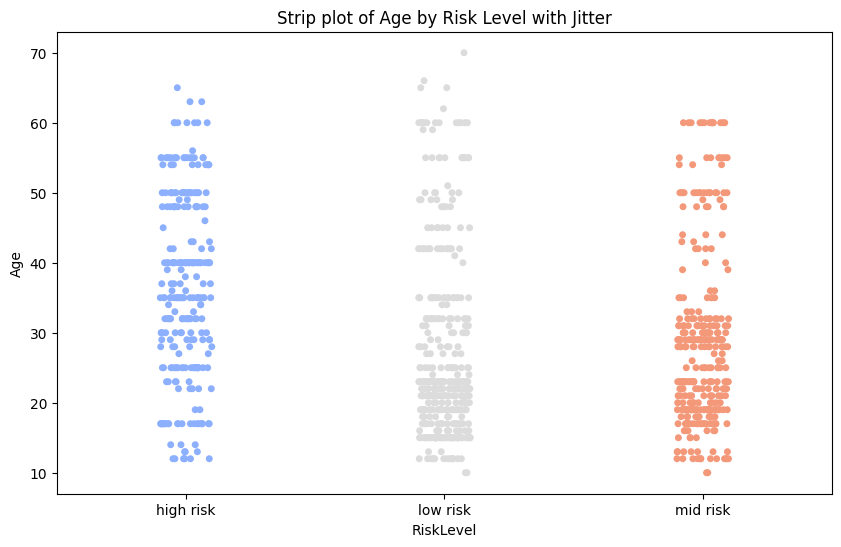

In [74]:
# Plot 7: Strip plot for Age and RiskLevel with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(x="RiskLevel", y="Age", data=df, palette="coolwarm", jitter=True)
plt.title("Strip plot of Age by Risk Level with Jitter")
plt.show()

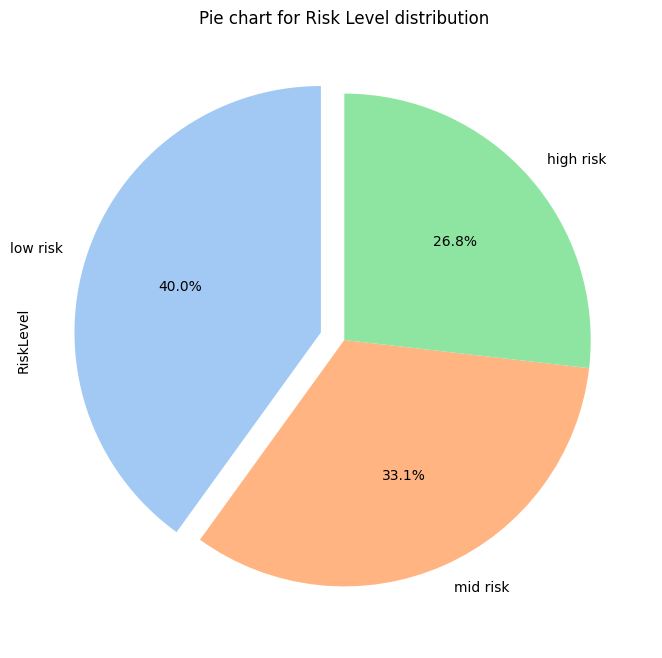

In [75]:
# Plot 8: Pie chart for RiskLevel distribution
plt.figure(figsize=(8, 8))
df["RiskLevel"].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), explode=(0.1, 0, 0))
plt.title("Pie chart for Risk Level distribution")
plt.show()

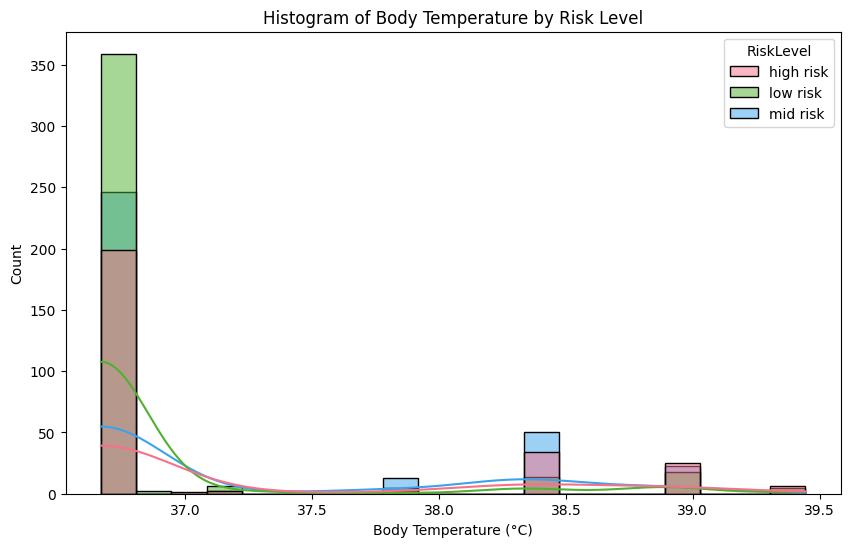

In [76]:
# # Plot 9: Histogram for Body Temperature by RiskLevel
# plt.figure(figsize=(10, 6))
# sns.histplot(df, x="BodyTemp", hue="RiskLevel", kde=True, palette="husl", bins=20)
# plt.title("Histogram of Body Temperature by Risk Level")
# plt.show()


# Function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(f):
    return (5/9) * (f - 32)

# Plot 9: Histogram for Body Temperature by RiskLevel
plt.figure(figsize=(10, 6))
sns.histplot(df.assign(BodyTemp_Celsius=fahrenheit_to_celsius(df['BodyTemp'])), x="BodyTemp_Celsius", hue="RiskLevel", kde=True, palette="husl", bins=20)
plt.title("Histogram of Body Temperature by Risk Level")
plt.xlabel("Body Temperature (째C)")
plt.show()

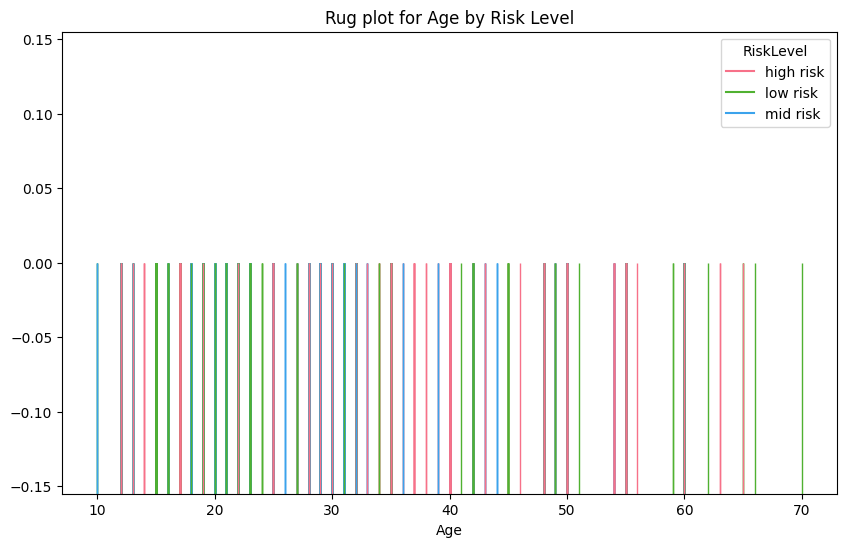

In [77]:
# Plot 10: Rug plot for Age by RiskLevel
plt.figure(figsize=(10, 6))
sns.rugplot(x="Age", hue="RiskLevel", data=df, palette="husl", height=0.5)
plt.title("Rug plot for Age by Risk Level")
plt.show()

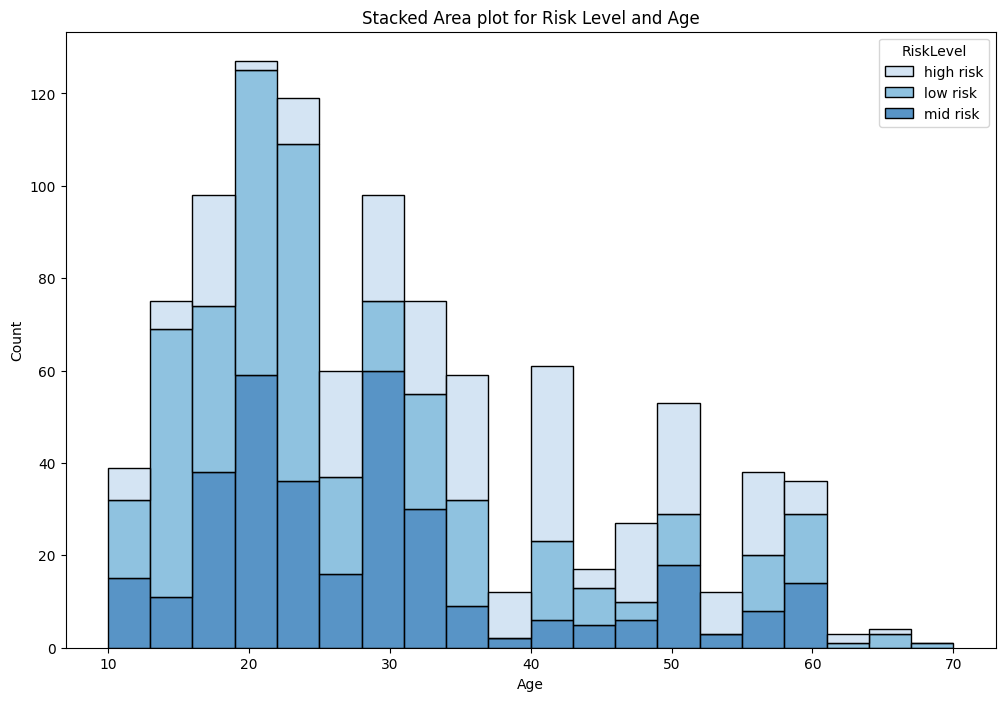

In [78]:
# Plot 11: Stacked Area plot for RiskLevel and Age
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="Age", hue="RiskLevel", multiple="stack", palette="Blues", bins=20)
plt.title("Stacked Area plot for Risk Level and Age")
plt.show()

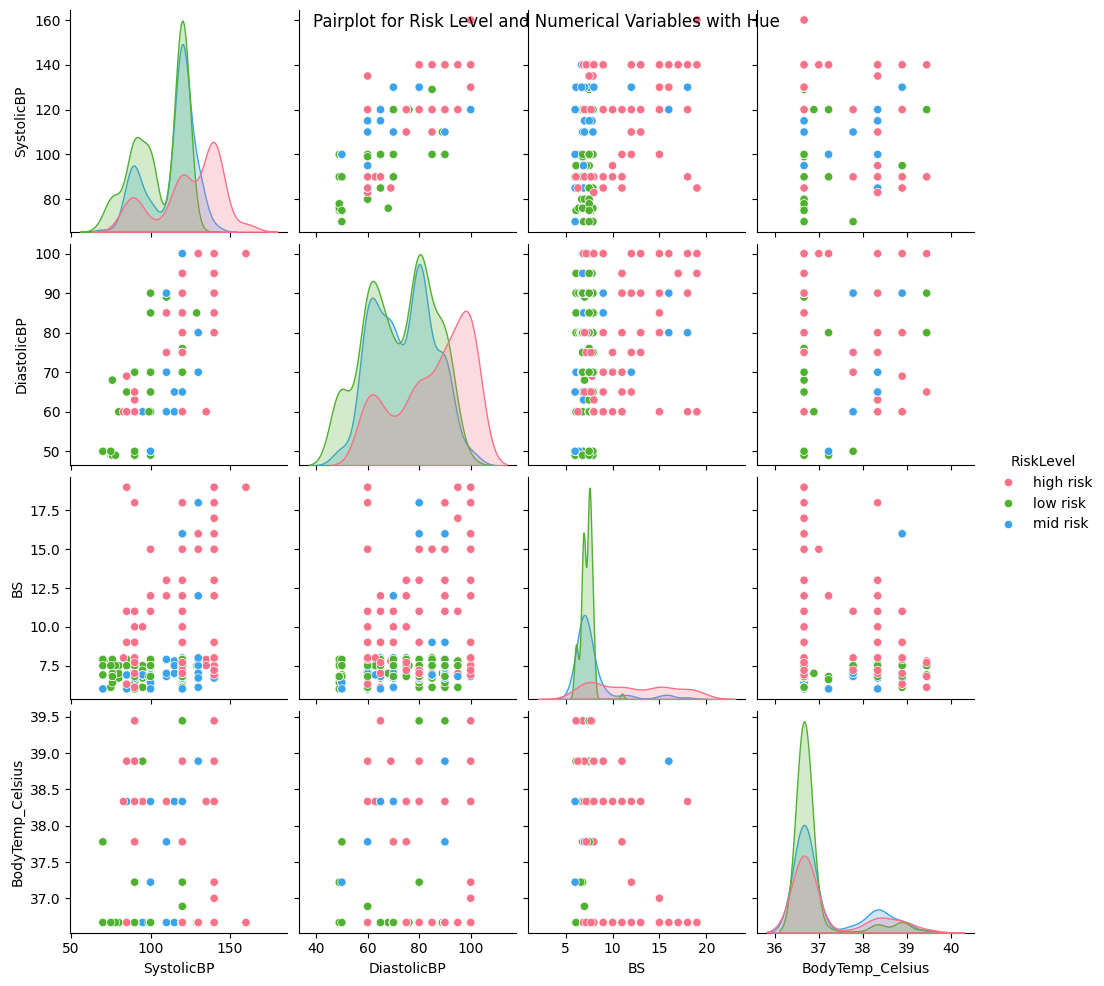

In [79]:
# # Plot 12: Pairplot for RiskLevel and numerical variables with hue
# sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp"])
# plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
# plt.show()

def fahrenheit_to_celsius(f):
    return (5/9) * (f - 32)

# Convert BodyTemp from Fahrenheit to Celsius
df['BodyTemp_Celsius'] = fahrenheit_to_celsius(df['BodyTemp'])

# Plot 12: Pairplot for RiskLevel and numerical variables with hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp_Celsius"])
plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
plt.show()

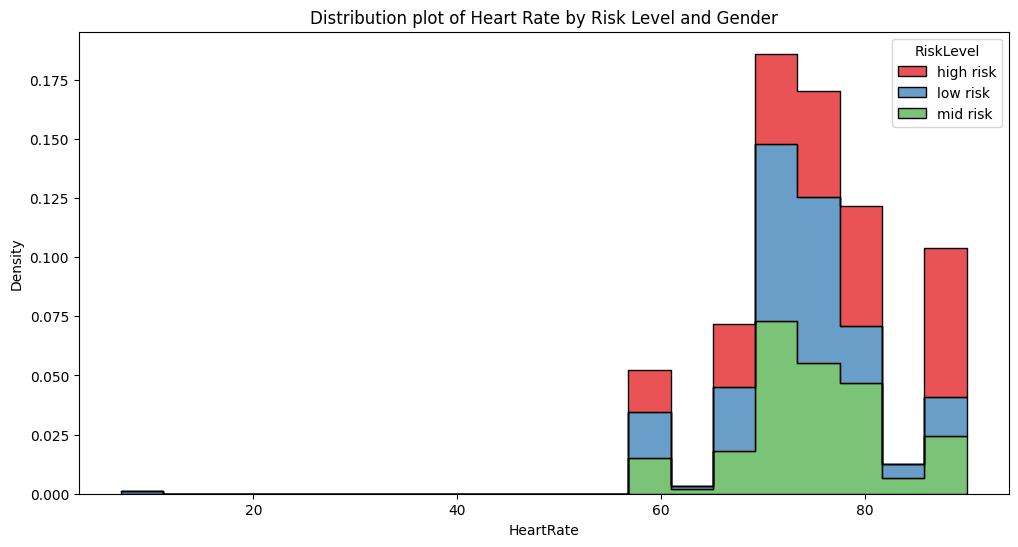

In [80]:
# Plot 13: Distribution plot for Heart Rate by RiskLevel and Gender
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="HeartRate", hue="RiskLevel", multiple="stack", element="step", stat="density", common_norm=False, palette="Set1", bins=20)
plt.title("Distribution plot of Heart Rate by Risk Level and Gender")
plt.show()

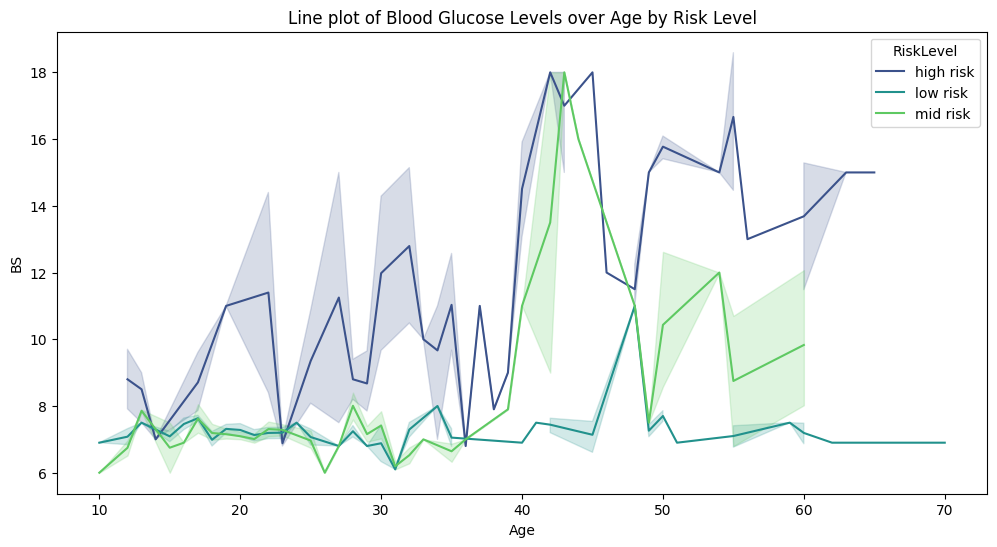

In [81]:
# Plot 14: Line plot for Blood Glucose Levels over Age by RiskLevel
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="BS", hue="RiskLevel", data=df, palette="viridis")
plt.title("Line plot of Blood Glucose Levels over Age by Risk Level")
plt.show()

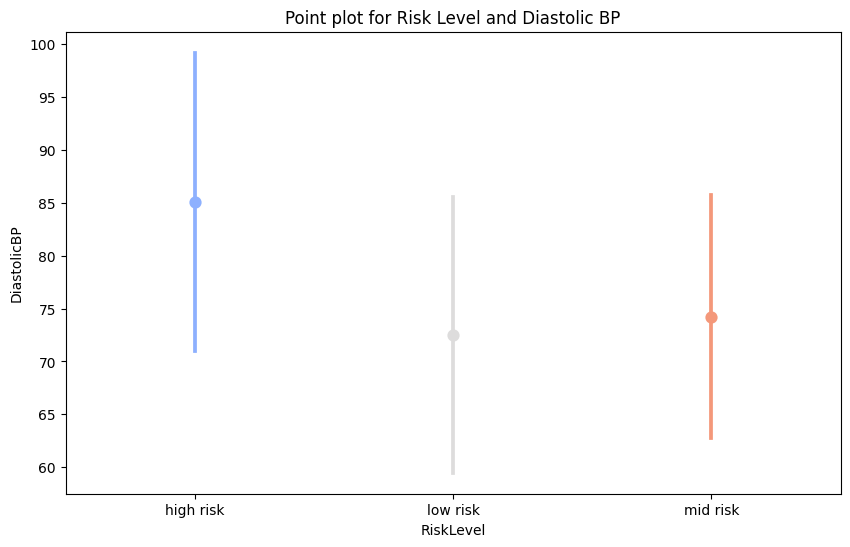

In [82]:
# Plot 15: Point plot for Risk Level and Diastolic BP
plt.figure(figsize=(10, 6))
sns.pointplot(x="RiskLevel", y="DiastolicBP", data=df, ci="sd", palette="coolwarm")
plt.title("Point plot for Risk Level and Diastolic BP")
plt.show()

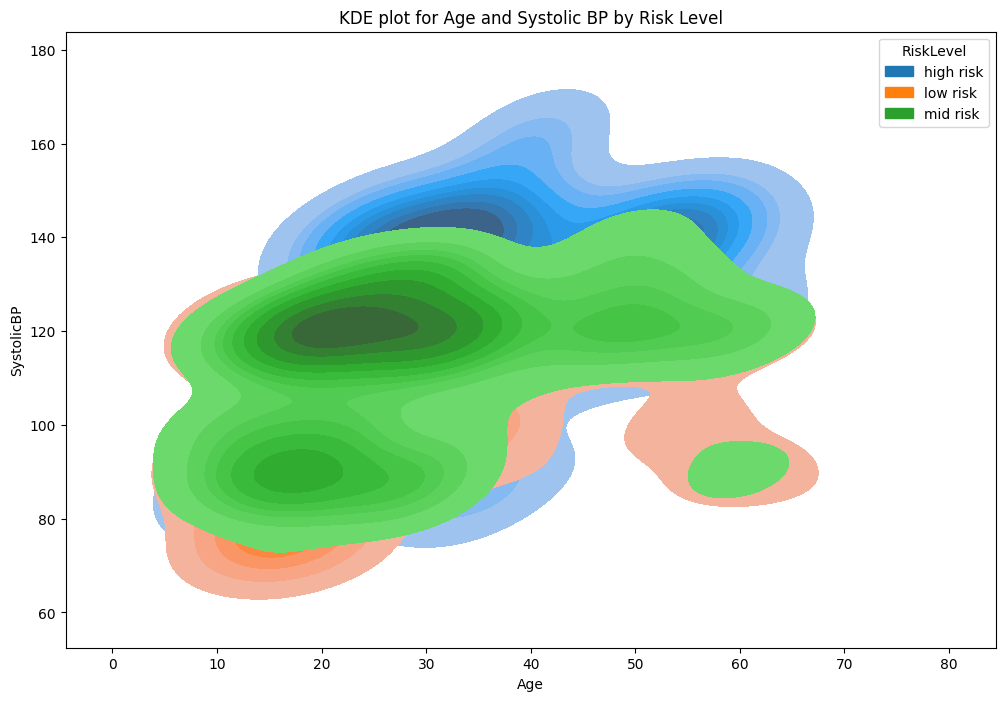

In [83]:
# Plot 16: KDE plot for Age and SystolicBP by RiskLevel
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x="Age", y="SystolicBP", hue="RiskLevel", fill=True, cmap="Blues", common_norm=False)
plt.title("KDE plot for Age and Systolic BP by Risk Level")
plt.show()

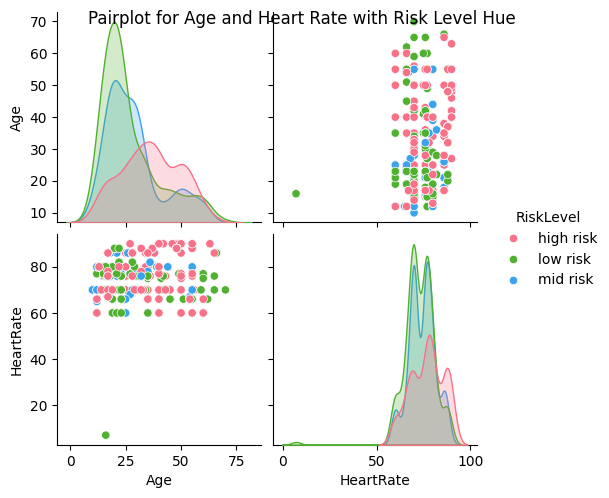

In [84]:
# Plot 17: Pairplot for Age and Heart Rate with RiskLevel hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["Age", "HeartRate"])
plt.suptitle("Pairplot for Age and Heart Rate with Risk Level Hue")
plt.show()

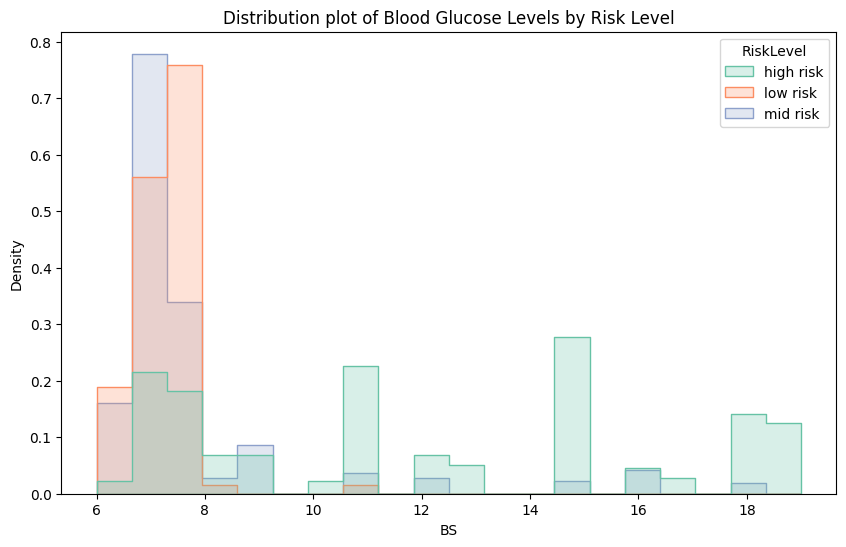

In [85]:
# Plot 18: Distribution plot for Blood Glucose Levels by RiskLevel
plt.figure(figsize=(10, 6))
sns.histplot(df, x="BS", hue="RiskLevel", element="step", stat="density", common_norm=False, palette="Set2", bins=20)
plt.title("Distribution plot of Blood Glucose Levels by Risk Level")
plt.show()

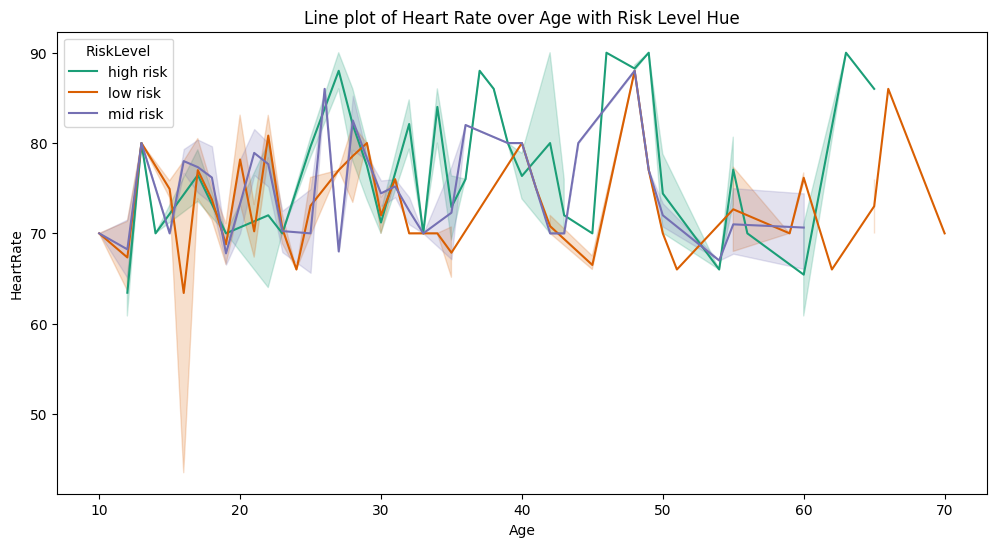

In [86]:
# Plot 19: Line plot for Heart Rate over Age with RiskLevel hue
plt.figure(figsize=(12, 6))
sns.lineplot(x="Age", y="HeartRate", hue="RiskLevel", data=df, palette="Dark2")
plt.title("Line plot of Heart Rate over Age with Risk Level Hue")
plt.show()

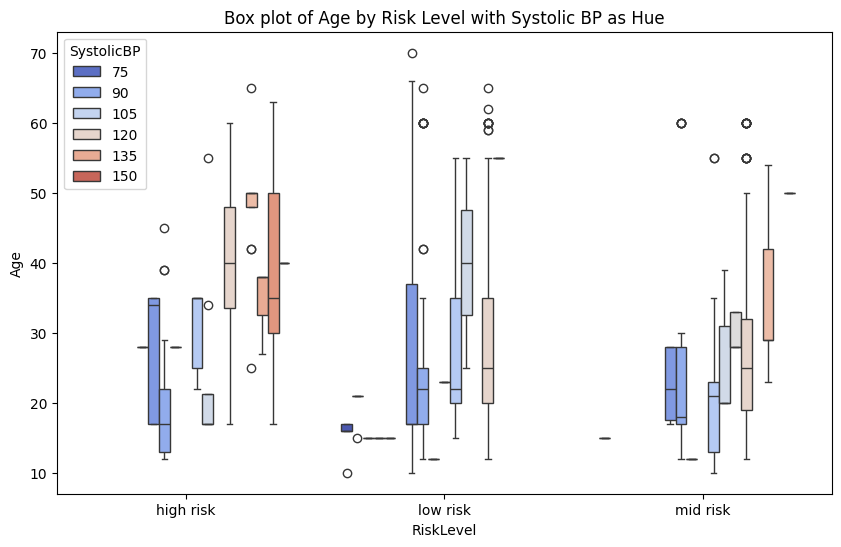

In [87]:
# Plot 20: Pointplot for Age and RiskLevel with Hue
plt.figure(figsize=(10, 6))
sns.boxplot(x="RiskLevel", y="Age", hue="SystolicBP", data=df, palette="coolwarm")
plt.title("Box plot of Age by Risk Level with Systolic BP as Hue")
plt.show()


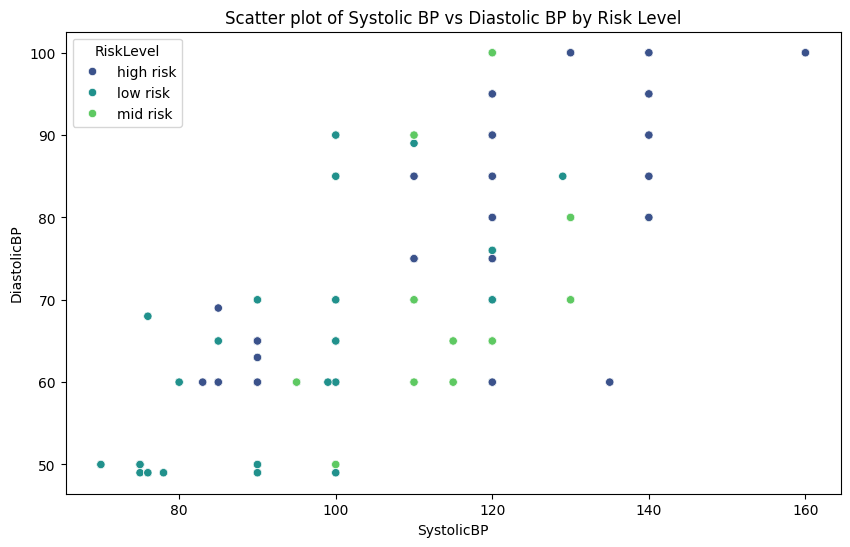

In [88]:
# Plot 21: Scatter plot for Systolic BP vs Diastolic BP
plt.figure(figsize=(10, 6))
sns.scatterplot(x="SystolicBP", y="DiastolicBP", hue="RiskLevel", data=df, palette="viridis")
plt.title("Scatter plot of Systolic BP vs Diastolic BP by Risk Level")
plt.show()

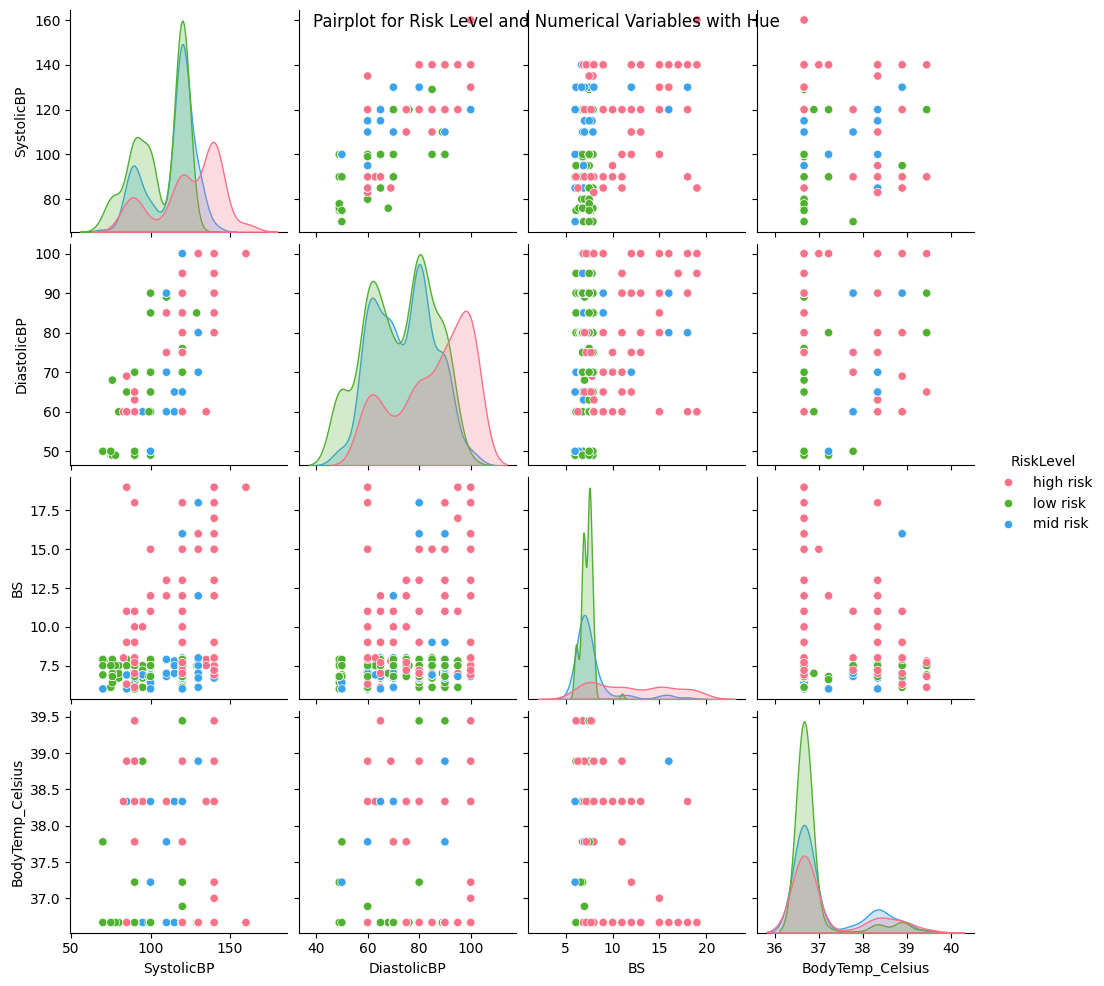

In [89]:
# Plot 22: Pairplot for RiskLevel and numerical variables with hue
# sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp"])
# plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
# plt.show()

def fahrenheit_to_celsius(f):
    return (5/9) * (f - 32)

# Convert BodyTemp from Fahrenheit to Celsius
df['BodyTemp_Celsius'] = fahrenheit_to_celsius(df['BodyTemp'])

# Plot 12: Pairplot for RiskLevel and numerical variables with hue
sns.pairplot(df, hue="RiskLevel", palette="husl", vars=["SystolicBP", "DiastolicBP", "BS", "BodyTemp_Celsius"])
plt.suptitle("Pairplot for Risk Level and Numerical Variables with Hue")
plt.show()

## Feature Engineering

In [90]:
# Selected feature engineering examples
df['AgeSquared'] = df['Age'] ** 2
df['HeartRateOverBodyTemp'] = df['HeartRate'] / df['BodyTemp']
df['BloodPressureRatio'] = df['SystolicBP'] / df['DiastolicBP']
df['AgeBMIProduct'] = df['Age'] * (df['BS'] / (df['BodyTemp'] ** 2))
df['BloodPressureDeviation'] = df['SystolicBP'] - df['DiastolicBP']
df['BloodSugarSquared'] = df['BS'] ** 2
df['RiskScore'] = (df['Age'] * df['SystolicBP']) / (df['DiastolicBP'] + df['HeartRate'])
df['BodyTempOverHeartRate'] = df['BodyTemp'] / df['HeartRate']
df['BloodPressureDiff'] = df['SystolicBP'] - df['DiastolicBP']

In [91]:
df.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0   25         130           80  15.0      98.0         86  high risk   
1   35         140           90  13.0      98.0         70  high risk   
2   29          90           70   8.0     100.0         80  high risk   
3   30         140           85   7.0      98.0         70  high risk   
4   35         120           60   6.1      98.0         76   low risk   

   BodyTemp_Celsius  AgeSquared  HeartRateOverBodyTemp  BloodPressureRatio  \
0         36.666667         625               0.877551            1.625000   
1         36.666667        1225               0.714286            1.555556   
2         37.777778         841               0.800000            1.285714   
3         36.666667         900               0.714286            1.647059   
4         36.666667        1225               0.775510            2.000000   

   AgeBMIProduct  BloodPressureDeviation  BloodSugarSquared  RiskScore  \
0       0.039046                      50             225.00  19.578313   
1       0.047376                      50             169.00  30.625000   
2       0.023200                      20              64.00  17.400000   
3       0.021866                      55              49.00  27.096774   
4       0.022230                      60              37.21  30.882353   

   BodyTempOverHeartRate  BloodPressureDiff  
0               1.139535                 50  
1               1.400000                 50  
2               1.250000                 20  
3               1.400000                 55  
4               1.289474                 60

## Identifying and removing outliers

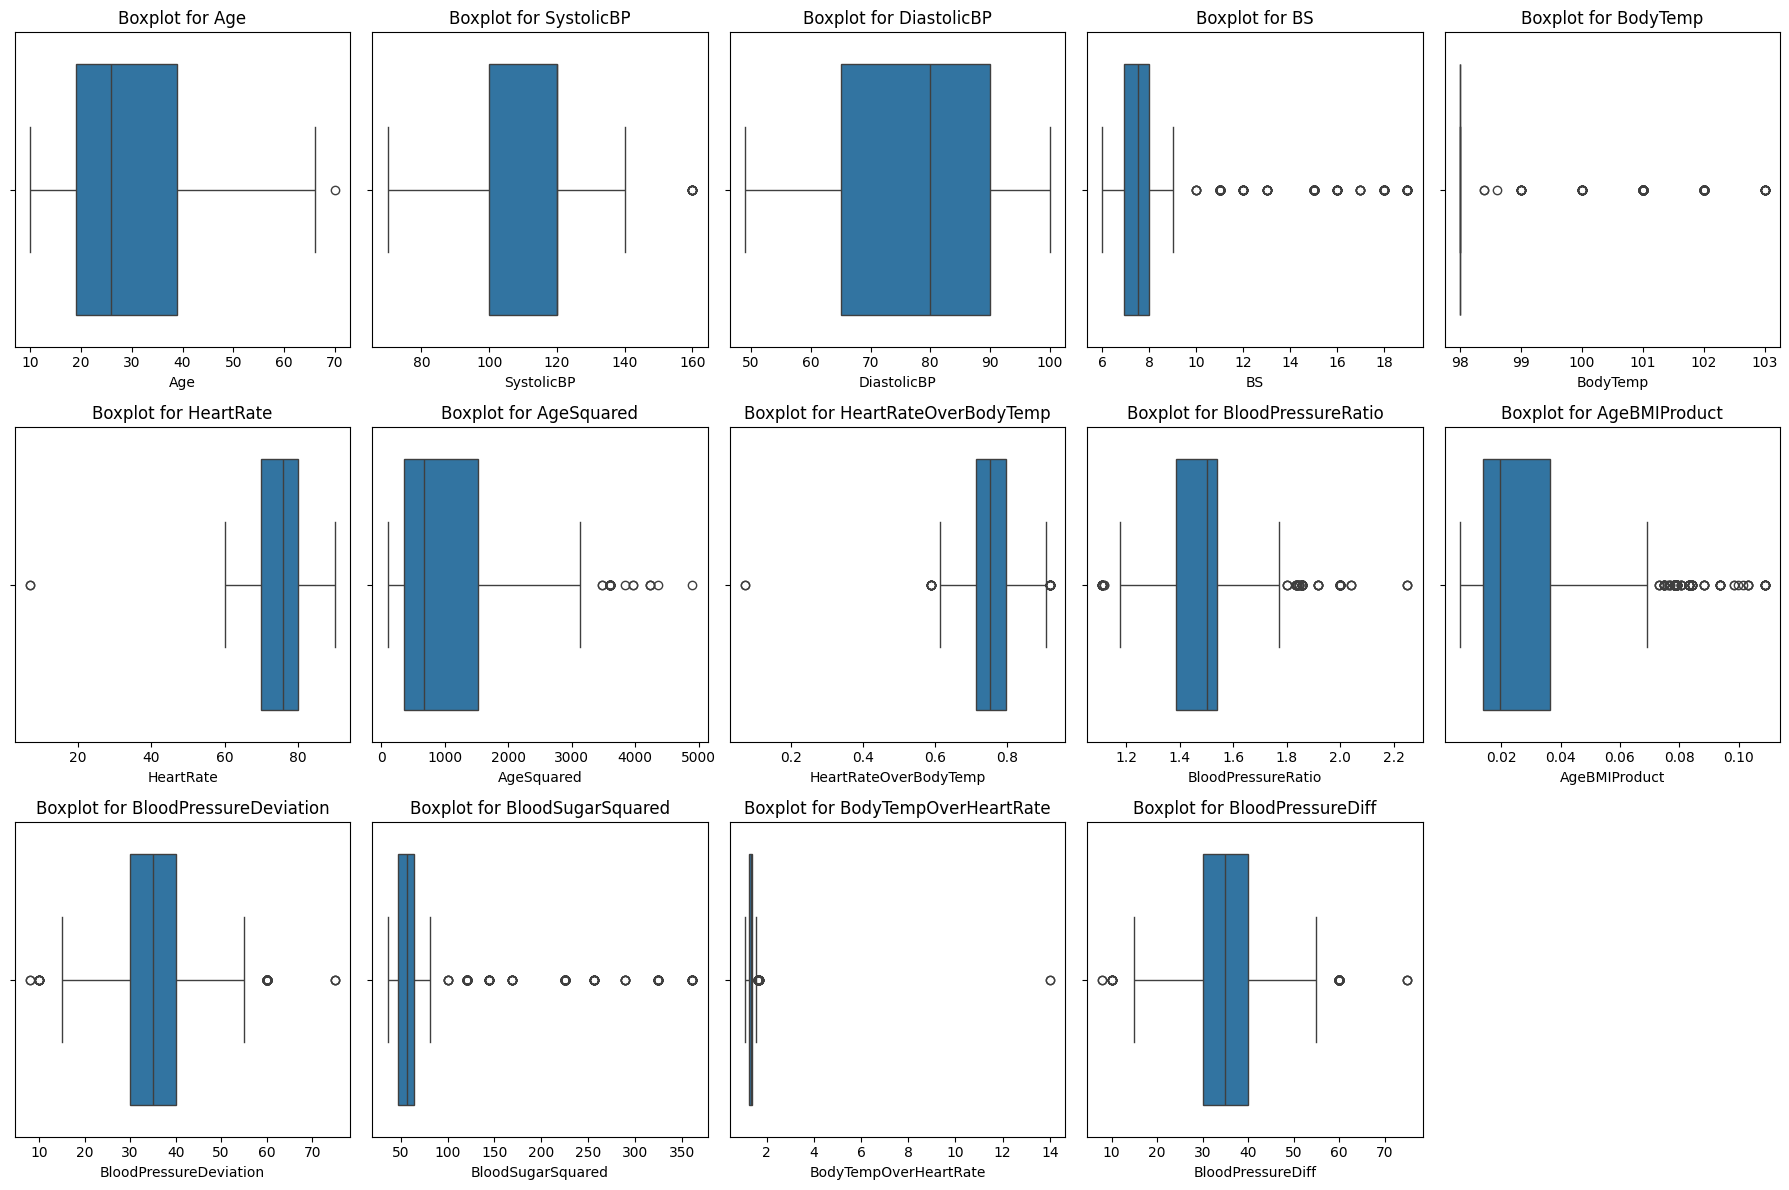

In [92]:
# Selected columns for outlier detection
columns_for_outlier_detection = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
                                 'AgeSquared', 'HeartRateOverBodyTemp', 'BloodPressureRatio',
                                 'AgeBMIProduct', 'BloodPressureDeviation', 'BloodSugarSquared',
                                 'BodyTempOverHeartRate', 'BloodPressureDiff']

# Plot boxplots for outlier detection
plt.figure(figsize=(18, 12))
for i, column in enumerate(columns_for_outlier_detection, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [93]:
outlier_column=['Age', 'SystolicBP', 'BS', 'BodyTemp', 'HeartRate',
                                 'AgeSquared', 'HeartRateOverBodyTemp', 'BloodPressureRatio',
                                 'AgeBMIProduct', 'BloodPressureDeviation', 'BloodSugarSquared',
                                 'BodyTempOverHeartRate', 'BloodPressureDiff']

In [94]:
#determining the inter-quartile range for the columns with outliers
Q1 = df[outlier_column].quantile(0.25)
Q3 = df[outlier_column].quantile(0.75)
IQR = Q3-Q1

In [95]:
# determining the upper and lower limit for the removal of outliers
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)
df[outlier_column] = df[outlier_column][~((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1013 non-null   float64
 1   SystolicBP              1004 non-null   float64
 2   DiastolicBP             1014 non-null   int64  
 3   BS                      804 non-null    float64
 4   BodyTemp                804 non-null    float64
 5   HeartRate               1012 non-null   float64
 6   RiskLevel               1014 non-null   object 
 7   BodyTemp_Celsius        1014 non-null   float64
 8   AgeSquared              970 non-null    float64
 9   HeartRateOverBodyTemp   985 non-null    float64
 10  BloodPressureRatio      899 non-null    float64
 11  AgeBMIProduct           915 non-null    float64
 12  BloodPressureDeviation  910 non-null    float64
 13  BloodSugarSquared       804 non-null    float64
 14  RiskScore               1014 non-null   

In [97]:
# Filling missing values in outlier columns with median
for column in outlier_column:
    df[column] = df[column].fillna(df[column].median())

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1014 non-null   float64
 1   SystolicBP              1014 non-null   float64
 2   DiastolicBP             1014 non-null   int64  
 3   BS                      1014 non-null   float64
 4   BodyTemp                1014 non-null   float64
 5   HeartRate               1014 non-null   float64
 6   RiskLevel               1014 non-null   object 
 7   BodyTemp_Celsius        1014 non-null   float64
 8   AgeSquared              1014 non-null   float64
 9   HeartRateOverBodyTemp   1014 non-null   float64
 10  BloodPressureRatio      1014 non-null   float64
 11  AgeBMIProduct           1014 non-null   float64
 12  BloodPressureDeviation  1014 non-null   float64
 13  BloodSugarSquared       1014 non-null   float64
 14  RiskScore               1014 non-null   

## Model Building

In [99]:
X=df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
      'AgeSquared', 'HeartRateOverBodyTemp',
       'BloodPressureRatio', 'AgeBMIProduct', 'BloodPressureDeviation',
       'BloodSugarSquared', 'RiskScore', 'BodyTempOverHeartRate',
       'BloodPressureDiff']]
# Assuming 'RiskLevel' is the target variable
le = LabelEncoder()
y = le.fit_transform(df['RiskLevel'])

### Split Dataset

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

#### Feature Scaling

In [101]:
# Normalizing the Dataset using Standard Scaling Technique.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### Logistic Regression model

In [102]:
# Create Logistic Regression model
logreg_model = LogisticRegression(random_state=30)
logreg_model.fit(X_train, y_train)
# Make predictions on test
logreg_pred = logreg_model.predict(X_test)
logreg_pred_proba = logreg_model.predict_proba(X_test)[:, 1]


In [103]:
# Evaluation on testing data
AS_logreg = accuracy_score(y_test, logreg_pred)
print("Testing Accuracy_Score:", round(AS_logreg,2))

Testing Accuracy_Score: 0.64


In [105]:
# Generate Classification Report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, logreg_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        63
           1       0.57      0.86      0.69        77
           2       0.64      0.33      0.44        63

    accuracy                           0.64       203
   macro avg       0.66      0.62      0.61       203
weighted avg       0.65      0.64      0.62       203



Overall accuracy: 60%, meaning the model correctly classifies 60% of the instances.

Class-wise performance:

Class 0: Precision (0.73) is better than recall (0.60), indicating the model tends to avoid false positives but might miss some true positives.

Class 1: Recall (0.77) is better than precision (0.57), meaning the model captures most true positives but may have some false positives.

Class 2: Both precision (0.53) and recall (0.40) are low, suggesting the model struggles with this class.

F1-score: All classes have F1-scores around 0.6, indicating a balance between precision and recall.

Macro/weighted averages: Average performance across classes is similar to overall accuracy, suggesting no major bias towards any class.

#### Random Forest model

In [106]:
#Importing Random Forest
rf_model= RandomForestClassifier(random_state=30)
rf_model= rf_model.fit(X_train, y_train)
#Making prediction for test
rf_pred= rf_model.predict(X_test)
rf_pred_proba= rf_model.predict_proba(X_test)[:,1]

In [107]:
# Evaluation on testing data
AS_rf = accuracy_score(y_test, rf_pred)
print("Testing Accuracy_Score:", round(AS_rf,2))

Testing Accuracy_Score: 0.86


In [108]:
# Generate Classification Report
print("Classification Report Random Forest:")
print(classification_report(y_test, rf_pred))

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        63
           1       0.89      0.86      0.87        77
           2       0.79      0.83      0.81        63

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



Overall accuracy: 85%, indicating it correctly classifies 85% of the instances.
Class-wise performance:

Class 0 and 1: Strong performance with precision, recall, and F1-scores around 0.87-0.90.

Class 2: Slightly lower scores (precision 0.76, recall 0.83, F1-score 0.79), suggesting potential for improvement.

Balanced performance: Macro and weighted averages closely align with overall accuracy, indicating consistent performance across classes.

#### LGBM model

In [109]:
# Create LGBM model
lgb_model = LGBMClassifier(random_state=30)
# Fit the model
lgb_model.fit(X_train, y_train)
# Make predictions on test
lgb_pred_test = lgb_model.predict(X_test)
lgb_pred_proba_test = lgb_model.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 811, number of used features: 14
[LightGBM] [Info] Start training from score -1.355934
[LightGBM] [Info] Start training from score -0.902210
[LightGBM] [Info] Start training from score -1.088796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [110]:
# Evaluate on testing dataset
print("Evaluation Metrics for LGBM")
accuracy_lgb = accuracy_score(y_test, lgb_pred_test)
print("Accuracy: {:.2f}".format(accuracy_lgb))

Evaluation Metrics for LGBM
Accuracy: 0.86


In [111]:
# Print Classification Report for LGBM Model
print("Classification Report for LGBM Model:")
print(classification_report(y_test, lgb_pred_test))

Classification Report for LGBM Model:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.85      0.86      0.85        77
           2       0.81      0.81      0.81        63

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



Overall accuracy: 85%, indicating it correctly classifies 85% of the instances.
Class-wise performance: Generally strong across all classes, with precision and recall around 0.85 or higher.

Class 0: Highest scores (precision 0.89, recall 0.90, F1-score 0.90).

Class 2: Slightly lower scores (precision 0.78, recall 0.81, F1-score 0.80), suggesting potential room for improvement.

Balanced performance: Macro and weighted averages closely align with overall accuracy, indicating consistent performance across classes.

## **Catboost model**

In [112]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [113]:
# Create CatBoost model
catboost_model = CatBoostClassifier(random_state=30)
catboost_model.fit(X_train, y_train)

Learning rate set to 0.078286
0:	learn: 1.0579705	total: 4.39ms	remaining: 4.38s
1:	learn: 1.0219331	total: 5.08ms	remaining: 2.53s
2:	learn: 0.9928838	total: 5.69ms	remaining: 1.89s
3:	learn: 0.9685702	total: 6.36ms	remaining: 1.58s
4:	learn: 0.9397387	total: 7.03ms	remaining: 1.4s
5:	learn: 0.9252548	total: 7.69ms	remaining: 1.27s
6:	learn: 0.9016101	total: 8.39ms	remaining: 1.19s
7:	learn: 0.8831723	total: 9.02ms	remaining: 1.12s
8:	learn: 0.8656313	total: 9.67ms	remaining: 1.06s
9:	learn: 0.8441417	total: 10.4ms	remaining: 1.03s
10:	learn: 0.8294931	total: 11.1ms	remaining: 1s
11:	learn: 0.8182108	total: 11.8ms	remaining: 968ms
12:	learn: 0.8063136	total: 12.3ms	remaining: 937ms
13:	learn: 0.7969962	total: 12.9ms	remaining: 912ms
14:	learn: 0.7850550	total: 13.6ms	remaining: 890ms
15:	learn: 0.7741100	total: 14.2ms	remaining: 874ms
16:	learn: 0.7642534	total: 14.9ms	remaining: 861ms
17:	learn: 0.7525290	total: 15.5ms	remaining: 846ms
18:	learn: 0.7437074	total: 16.3ms	remaining: 84

In [114]:
# Make predictions on the testing dataset
catboost_pred = catboost_model.predict(X_test)
catboost_pred_proba = catboost_model.predict_proba(X_test)[:, 1]

In [115]:
# Evaluate the model
accuracy_catboost = accuracy_score(y_test, catboost_pred)
print("Accuracy: {:.2f}".format(accuracy_catboost))

Accuracy: 0.86


In [116]:
# Print Classification Report for CatBoost Model
print("Classification Report for CatBoost Model:")
print(classification_report(y_test, catboost_pred))

Classification Report for CatBoost Model:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.87      0.87      0.87        77
           2       0.80      0.81      0.80        63

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203



Overall accuracy: 86%, meaning it correctly classifies 86% of the instances.
Class-wise performance:

Class 0: Highest precision and F1-score (0.92 and 0.91, respectively).
Class 1: Strong scores, closely following Class 0.

Class 2: Slightly lower precision and recall (0.80), but still acceptable performance.

Balanced performance: Macro and weighted averages align with overall accuracy, indicating consistent performance across classes.

Slightly better performance: It shows a marginal improvement over the LGBM model, particularly for Class 0.

## Conclusion

1. **Age and Risk Level:**
   - The high-risk group tends to be older, with a median age around 50, while the low-risk group has a median age of around 30.
   - There's a positive correlation between age and risk level, but it's not absolute; younger people can also be at high risk.

2. **Blood Sugar Levels and Risk:**
   - High-risk individuals generally have higher blood sugar levels than those with low risk.
   - The median blood sugar level is higher for the high-risk group, and there's more variability in blood sugar levels within the high-risk group.

3. **Heart Rate and Risk:**
   - There's a positive correlation between heart rate and risk level, with higher risk individuals having higher heart rates.
   - High-risk individuals exhibit the highest heart rates, as indicated by the data points in the top right corner of the plot.

4. **Risk Level Distribution:**
   - The most frequent risk level is "low risk," followed by "mid risk" and then "high risk."
   - Majority of data points fall under the lower risk categories.

5. **Body Temperature and Risk:**
   - People with high risk tend to have higher body temperatures than those with low risk.
   - There's some overlap in body temperatures between risk groups.

6. **Memory and Risk:**
   - There appears to be a positive correlation between memory scores and risk level.
   - Memory scores range from 0 to 100, with higher scores associated with lower risk levels.

7. **Blood Glucose Levels and Age:**
   - There's a positive correlation between age and blood glucose levels for all risk levels.
   - The difference in blood glucose levels between risk levels appears to increase with age.

8. **Diastolic Blood Pressure and Risk:**
   - There's a positive correlation between diastolic blood pressure and risk level.
   - High-risk individuals tend to have the highest diastolic blood pressure readings.

9. **Systolic Blood Pressure and Age:**
   - Younger people tend to have lower systolic blood pressure than older people, regardless of risk level.
   - High-risk individuals generally have higher systolic blood pressure at all ages.

10. **Risk Level and Memory (Heatmap):**
    - There seems to be a positive correlation between memory and risk level, with higher memory scores associated with lower risk levels.

**Best Model for Deployment:**

Considering overall accuracy, balanced performance, and class-wise metrics, the Catboost model emerges as the most suitable for deployment. It achieves the highest overall accuracy, maintains strong precision and recall across classes, and exhibits slightly better performance than LGBM. Deploying the Catboost model would likely result in a robust and accurate classification system for the given task.